In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats


In [3]:
import matplotlib.pyplot as plt

# Increase the figure size

sns.set(rc={'figure.figsize':(15,20)})
sns.set_context("poster", font_scale = 3)
sns.set_style("white")


# Use a high-resolution setting for saving the figure
plt.rcParams['savefig.dpi'] = 300

# Use a vector format for saving the figure (e.g., PDF, SVG) for scalability
plt.rcParams['savefig.format'] = 'pdf'

# Use a high-quality image format for display (e.g., PNG)
plt.rcParams['figure.dpi'] = 300

# Increase the line width
plt.rcParams['lines.linewidth'] = 1.5

# Increase the marker size
plt.rcParams['lines.markersize'] = 8

# Increase the size of tick labels
plt.rcParams['xtick.labelsize'] = 40
plt.rcParams['ytick.labelsize'] = 40

# Increase the spacing between subplots
plt.subplots_adjust(hspace=0.3)

# Use a white background with black grid lines
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.edgecolor'] = 'black'
plt.rcParams['grid.color'] = 'black'


# Use a serif font for better readability
plt.rcParams['font.family'] = 'serif'

# Set the output file format and resolution for saving the figure
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['savefig.format'] = 'pdf'

<Figure size 4500x6000 with 0 Axes>

## wet dry 2

In [4]:
#Import data
df_wetdry2 = pd.read_csv('data_wet-dry2.csv')
df_wetdry2.head(5)
legend_map = {'A - dry':'Dry', 'B - dry to wet':'Dry to wet','C - wet to dry': 'Wet to dry','D - wet' : 'Wet'}
df_wetdry2["Conditions"] = df_wetdry2["Condition"].map(legend_map)
#print(legend_map.items())


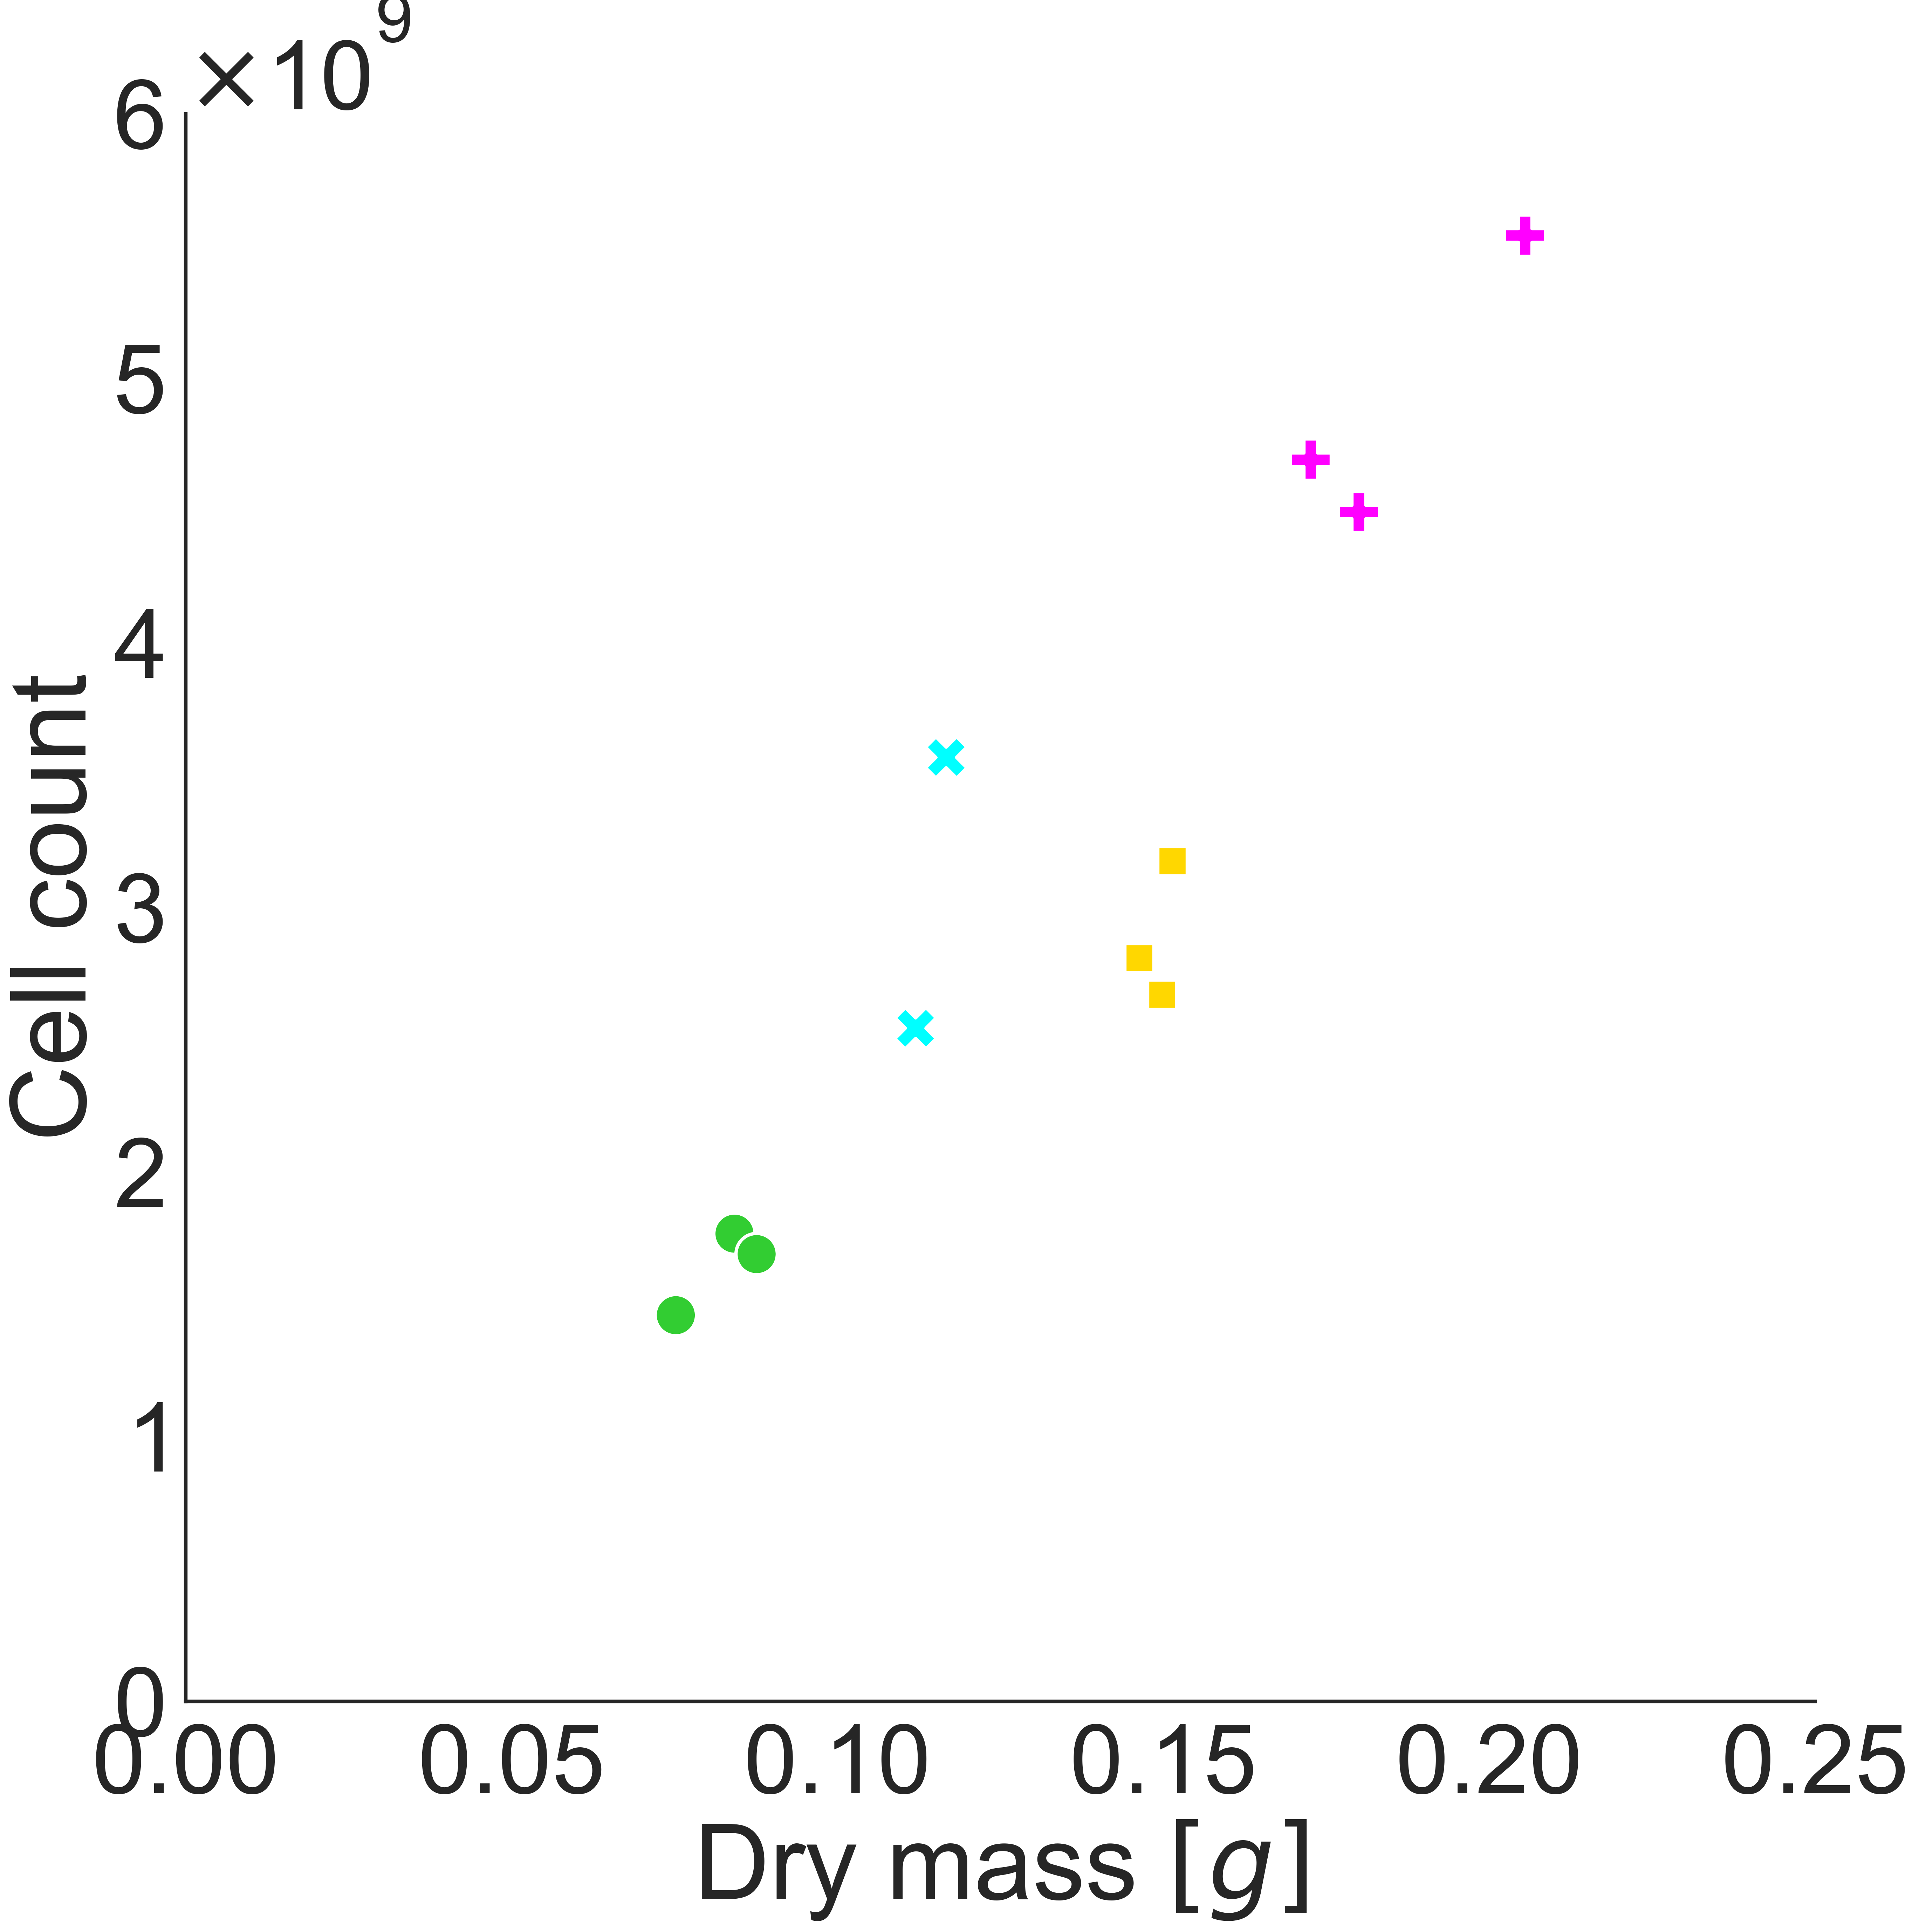

In [5]:
sns.set(rc={'figure.figsize':(20,20)})
sns.set_context("poster", font_scale = 3)
sns.set_style("white")

# dark - ott sem látszik a sárga
colors=['limegreen', 'cyan','gold', 'magenta']
sns.set_palette(colors)
legend_map = {'A - dry':'Dry', 'C - wet to dry': 'Wet to dry', 'B - dry to wet':'Dry to wet','D - wet' :'Wet'}

pWD2= sns.scatterplot(data=df_wetdry2, x="Dry_Mass_g", y="Cell_count", hue="Conditions", style = "Conditions",   s=800 , legend = None)


plt.ylim(0, 6000000000)
plt.xlim(0, 0.25)
plt.xlabel('Dry mass $[g]$')
plt.ylabel('Cell count')

#plt.legend( markerscale=3)
# l = pWD2.legend()
# l.get_texts()[0].set_text('Condition') # You can also change the legend title
# l.get_texts()[1].set_text('Dry')
# l.get_texts()[2].set_text('Dry to wet')
# l.get_texts()[3].set_text('Wet to dry')
# l.get_texts()[4].set_text('Wet')


#pWD2.legend(legend_map, loc='upper left')
# plt.legend(l, markerscale=3)

# ez csinál hatványkitevőt az y tengelyre
plt.ticklabel_format(axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=True)

#plt.legend(markerscale=2)
sns.despine()
plt.show()


## Wet-Dry2 growth curves


In [6]:
#Import data
wetdry2_growth = pd.read_csv('WD2_growth.csv')


#read simulation data
WDsimul = pd.read_csv('WD_simul.csv')
#rescale parameters
WDsimul['Time (Days)'] = WDsimul['Hour']/24



# map the conditions
legend_map = {'A':'Dry', 'B':'Dry to wet','C': 'Wet to dry','D' : 'Wet'}
wetdry2_growth["Conditions"] = wetdry2_growth["Sample"].str[0].map(legend_map)


In [7]:
wetdry2_growth.head()

,Label,Area,Mean,Min,Max,XM,YM,BX,BY,Width,...,Solidity,Sample,Area_mm2,Date,Converted date,Time,Converted time,Date+time,Elapsed time (Days),Conditions
0,A1stack.tif:\t2022:07:28 13:51:3,47754,231.65,113,252,874.91,841.56,738,716,259,...,0.94,A1,60.232396,7/28/2022,44770,13:51:03,0.577118,44770.57712,2.1,Dry
1,A1stack.tif:\t2022:07:29 10:34:0,53235,218.61,113,237,1169.30,874.94,1036,747,264,...,0.99,A1,67.145613,7/29/2022,44771,10:34:00,0.440278,44771.44028,3.0,Dry
2,A1stack.tif:\t2022:08:01 14:19:2,96369,235.98,105,253,770.31,650.52,593,472,359,...,0.97,A1,121.550776,8/1/2022,44774,14:19:02,0.596551,44774.59655,6.1,Dry
3,A1stack.tif:\t2022:08:02 14:53:4,103607,221.66,113,247,1071.84,780.74,887,602,367,...,0.99,A1,130.680107,8/2/2022,44775,14:53:04,0.620185,44775.62019,7.2,Dry
4,A1stack.tif:\t2022:08:03 10:06:4,122439,234.85,113,253,1109.60,681.23,906,476,410,...,0.98,A1,154.433017,8/3/2022,44776,10:06:04,0.420880,44776.42088,8.0,Dry


In [8]:
WDsimul_jav = WDsimul.melt(id_vars='Time (Days)', value_vars =['Dry', 'Dry to wet', 'Wet to dry','Wet'], 
        var_name ='Conditions', value_name ='Area')

WDsimul_jav['Area']=WDsimul_jav['Area']/55.6

WDsimul_jav.head()

,Time (Days),Conditions,Area
0,0.000000,Dry,4.784173
1,0.041667,Dry,6.636691
2,0.083333,Dry,7.266187
3,0.125000,Dry,10.035971
4,0.166667,Dry,10.773381


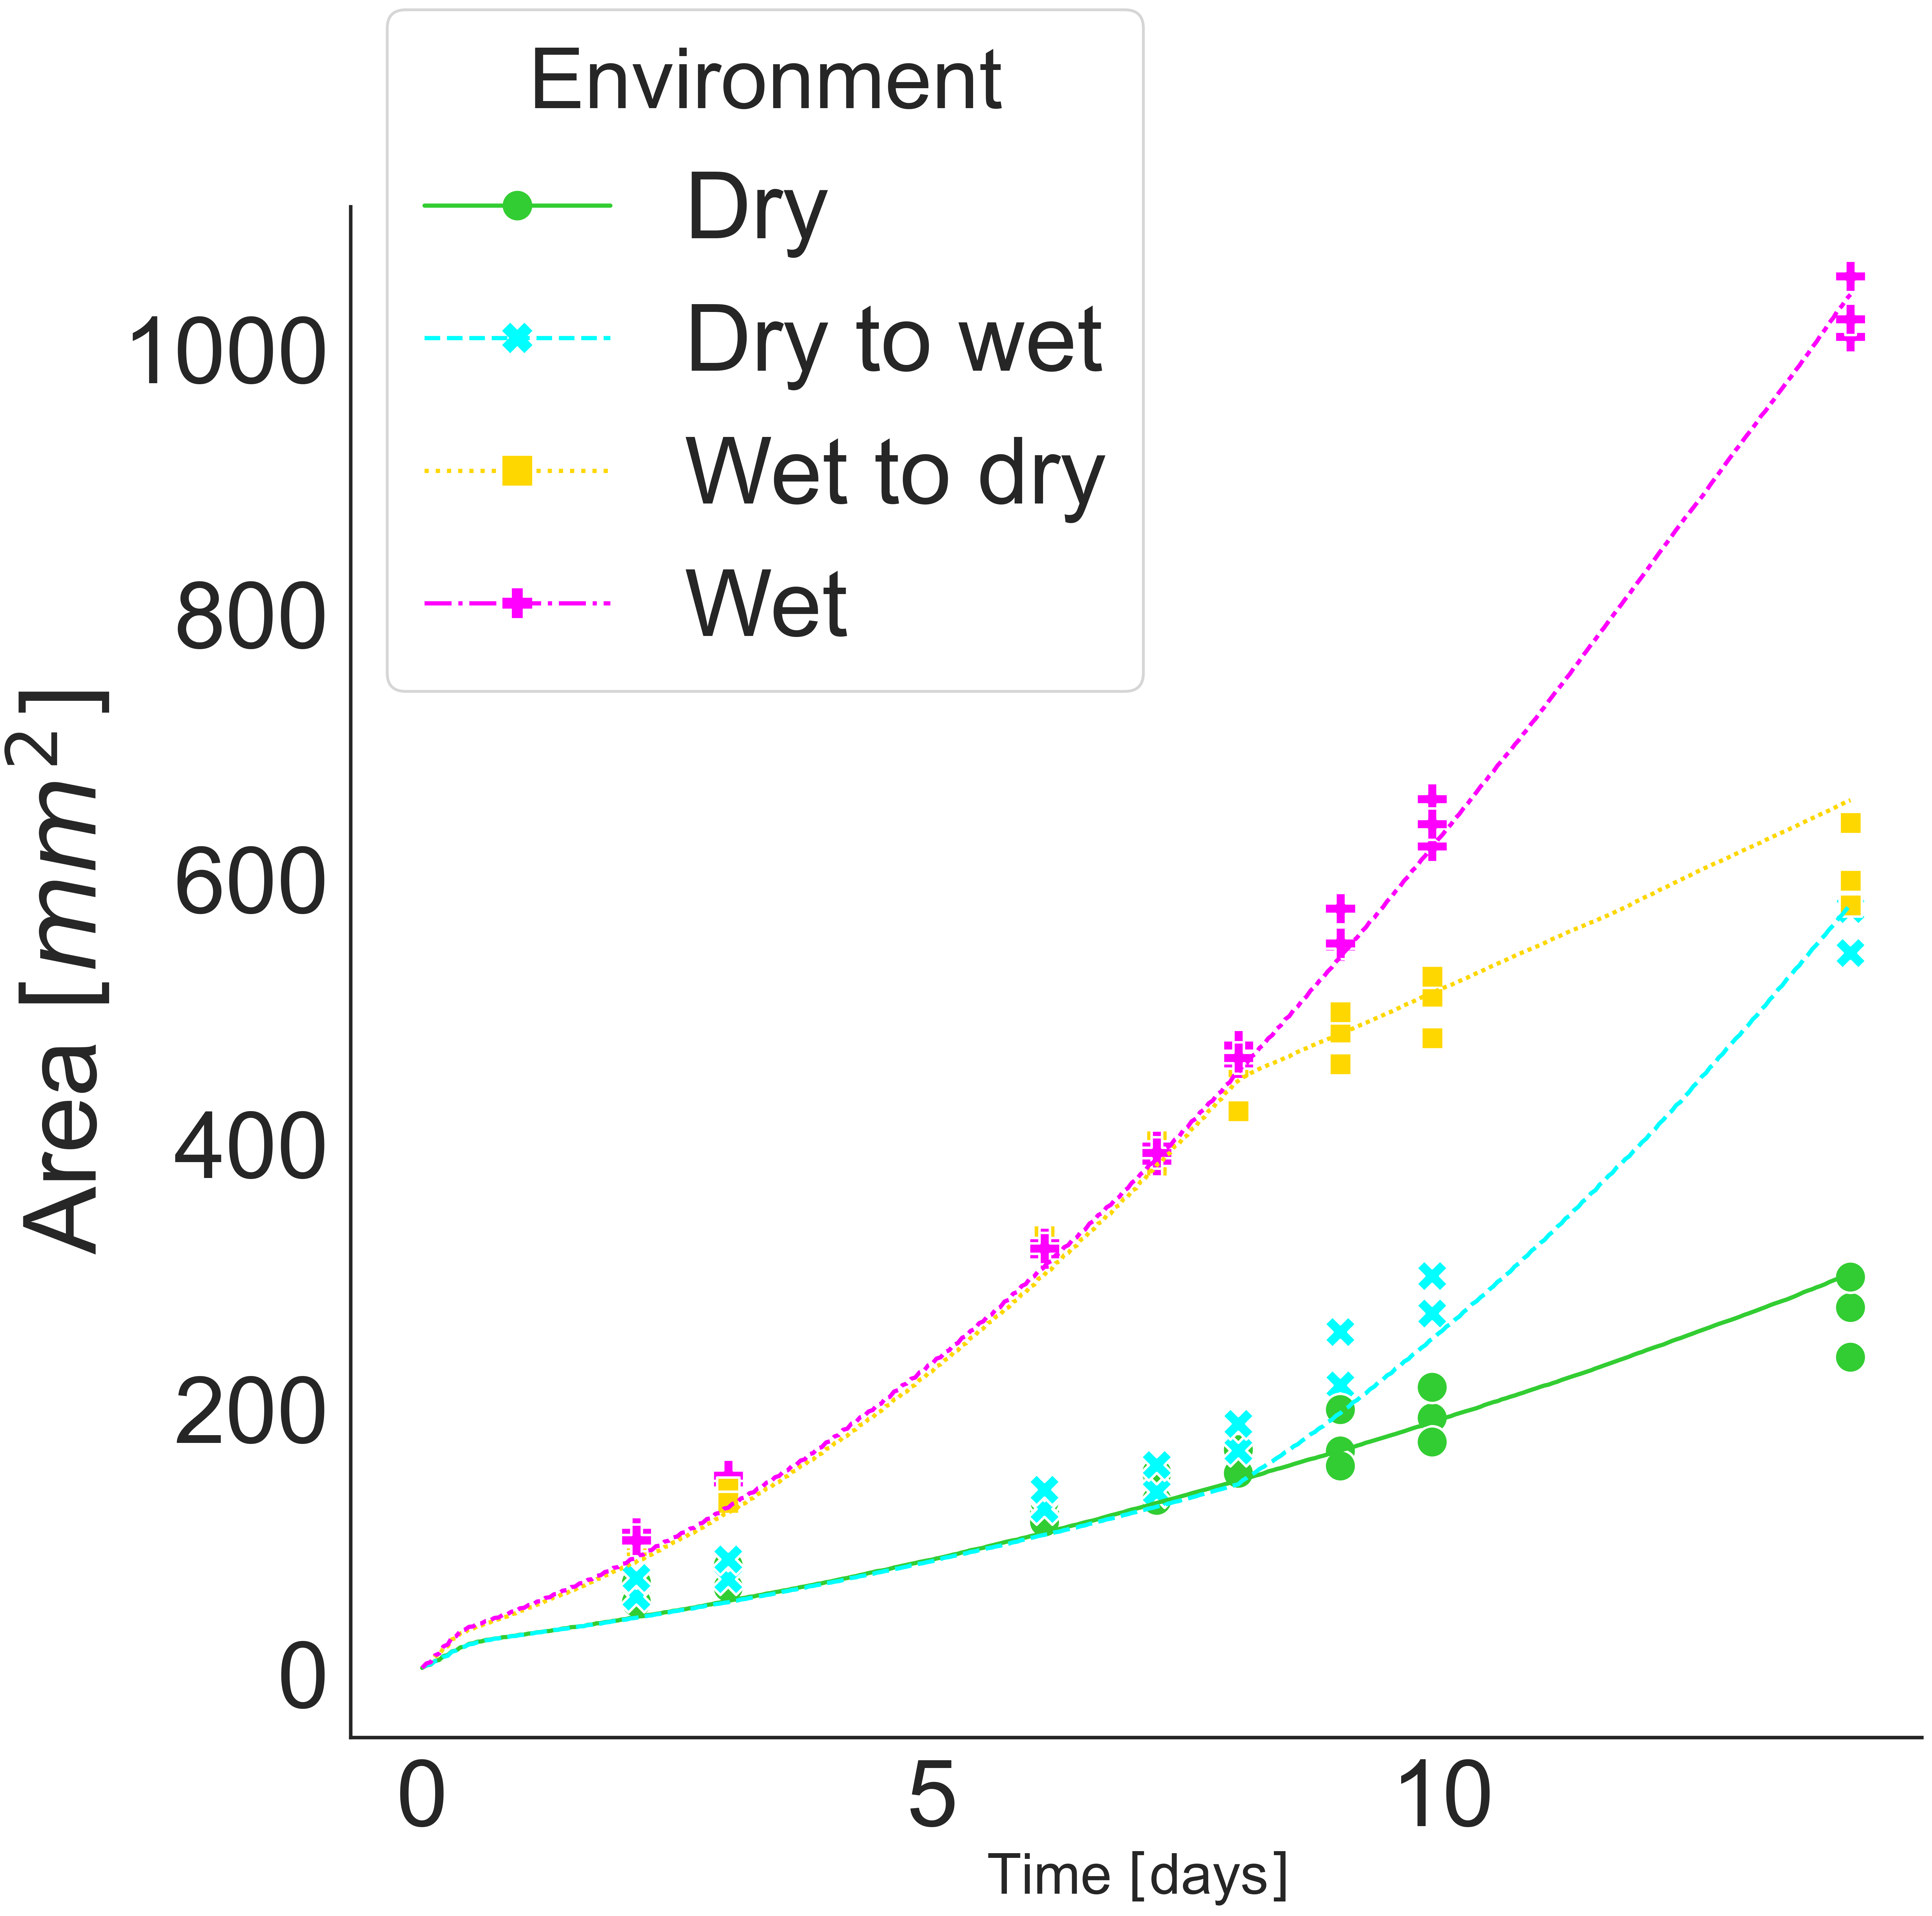

In [9]:
fig, ax1 = plt.subplots() # initializes figure and plots


# plot growth curve
sns.set_context("poster", font_scale = 3)
sns.set_style("white")
# dark - ott sem látszik a sárga
colors=['limegreen', 'cyan','gold', 'magenta']
sns.set_palette(colors)

sns.scatterplot(
    data=wetdry2_growth,
    x="Elapsed time (Days)", y="Area_mm2", 
    hue="Conditions", style="Conditions",s=500 , legend = None)

plt.ylabel('Area $[mm^2]$')


sns.lineplot(data=WDsimul_jav, x='Time (Days)', y='Area',hue="Conditions", style="Conditions", ax=ax1 , legend = None)

legend_labels = ['Dry', 'Dry to wet', 'Wet to dry','Wet']
legend_handles = [
    plt.Line2D([0], [0], marker='o', color=colors[0], linestyle='-', label=legend_labels[0], markerfacecolor=colors[0], markersize=20),
    plt.Line2D([0], [0], marker='X', color=colors[1], linestyle='--', label=legend_labels[1], markerfacecolor=colors[1], markersize=20),
    plt.Line2D([0], [0], marker='s', color=colors[2], linestyle=':', label=legend_labels[2], markerfacecolor=colors[2], markersize=20),
    plt.Line2D([0], [0], marker='P', color=colors[3], linestyle='-.', label=legend_labels[3], markerfacecolor=colors[3], markersize=20)
]

# fig.legend(handles=legend_handles, labels=legend_labels, title='Environment', loc='outside upper left', bbox_to_anchor=(0, 1), title_fontsize=60, ncol = 4)
fig.legend(handles=legend_handles, labels=legend_labels, title='Environment', loc='upper left', bbox_to_anchor=(0.12, 1), title_fontsize=60)
plt.xlabel('Time $[$days$]$',  fontsize=40)
sns.despine()


In [10]:
wetdry2_growth

,Label,Area,Mean,Min,Max,XM,YM,BX,BY,Width,...,Solidity,Sample,Area_mm2,Date,Converted date,Time,Converted time,Date+time,Elapsed time (Days),Conditions
0,A1stack.tif:\t2022:07:28 13:51:3,47754,231.65,113,252,874.91,841.56,738,716,259,...,0.94,A1,60.232396,7/28/2022,44770,13:51:03,0.577118,44770.57712,2.1,Dry
1,A1stack.tif:\t2022:07:29 10:34:0,53235,218.61,113,237,1169.30,874.94,1036,747,264,...,0.99,A1,67.145613,7/29/2022,44771,10:34:00,0.440278,44771.44028,3.0,Dry
2,A1stack.tif:\t2022:08:01 14:19:2,96369,235.98,105,253,770.31,650.52,593,472,359,...,0.97,A1,121.550776,8/1/2022,44774,14:19:02,0.596551,44774.59655,6.1,Dry
3,A1stack.tif:\t2022:08:02 14:53:4,103607,221.66,113,247,1071.84,780.74,887,602,367,...,0.99,A1,130.680107,8/2/2022,44775,14:53:04,0.620185,44775.62019,7.2,Dry
4,A1stack.tif:\t2022:08:03 10:06:4,122439,234.85,113,253,1109.60,681.23,906,476,410,...,0.98,A1,154.433017,8/3/2022,44776,10:06:04,0.420880,44776.42088,8.0,Dry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,D1stack.tif:\t2022:08:04 10:34:3,437640,167.84,106,221,944.58,757.93,570,393,760,...,0.97,D1,551.997858,8/4/2022,44777,10:31:04,0.438241,44777.43824,9.0,Wet
84,D1stack.tif:\t2022:08:05 09:42:3,508997,170.34,103,216,856.05,669.72,456,276,814,...,0.98,D1,642.000854,8/5/2022,44778,9:46:02,0.406968,44778.40697,9.9,Wet
85,D1stack.tif:\t2022:08:09 11:10:1,811200,160.49,108,198,972.70,593.10,463,100,1036,...,0.98,D1,1023.171242,8/9/2022,44782,11:11:04,0.466019,44782.46602,14.0,Wet
86,C3stack.tif:\t2022:08:04 10:34:0,396307,168.91,115,223,958.38,776.33,607,415,713,...,0.97,C3,499.864307,8/4/2022,44777,10:34:00,0.440278,44777.44028,9.0,Wet to dry


In [11]:
#Import data
df_cellno = pd.read_csv('simul_cell_no.csv')
df_cellno = df_cellno.sort_values(by=['order'])
df_cellno.head(5)

,condition,living,dead,living+dead,order
1,dry,600426,1679286,2279712,1
3,dry->wet,1466594,3322776,4789370,2
2,wet->dry,456129,4477243,4933372,3
0,wet,788319,5212196,6000515,4


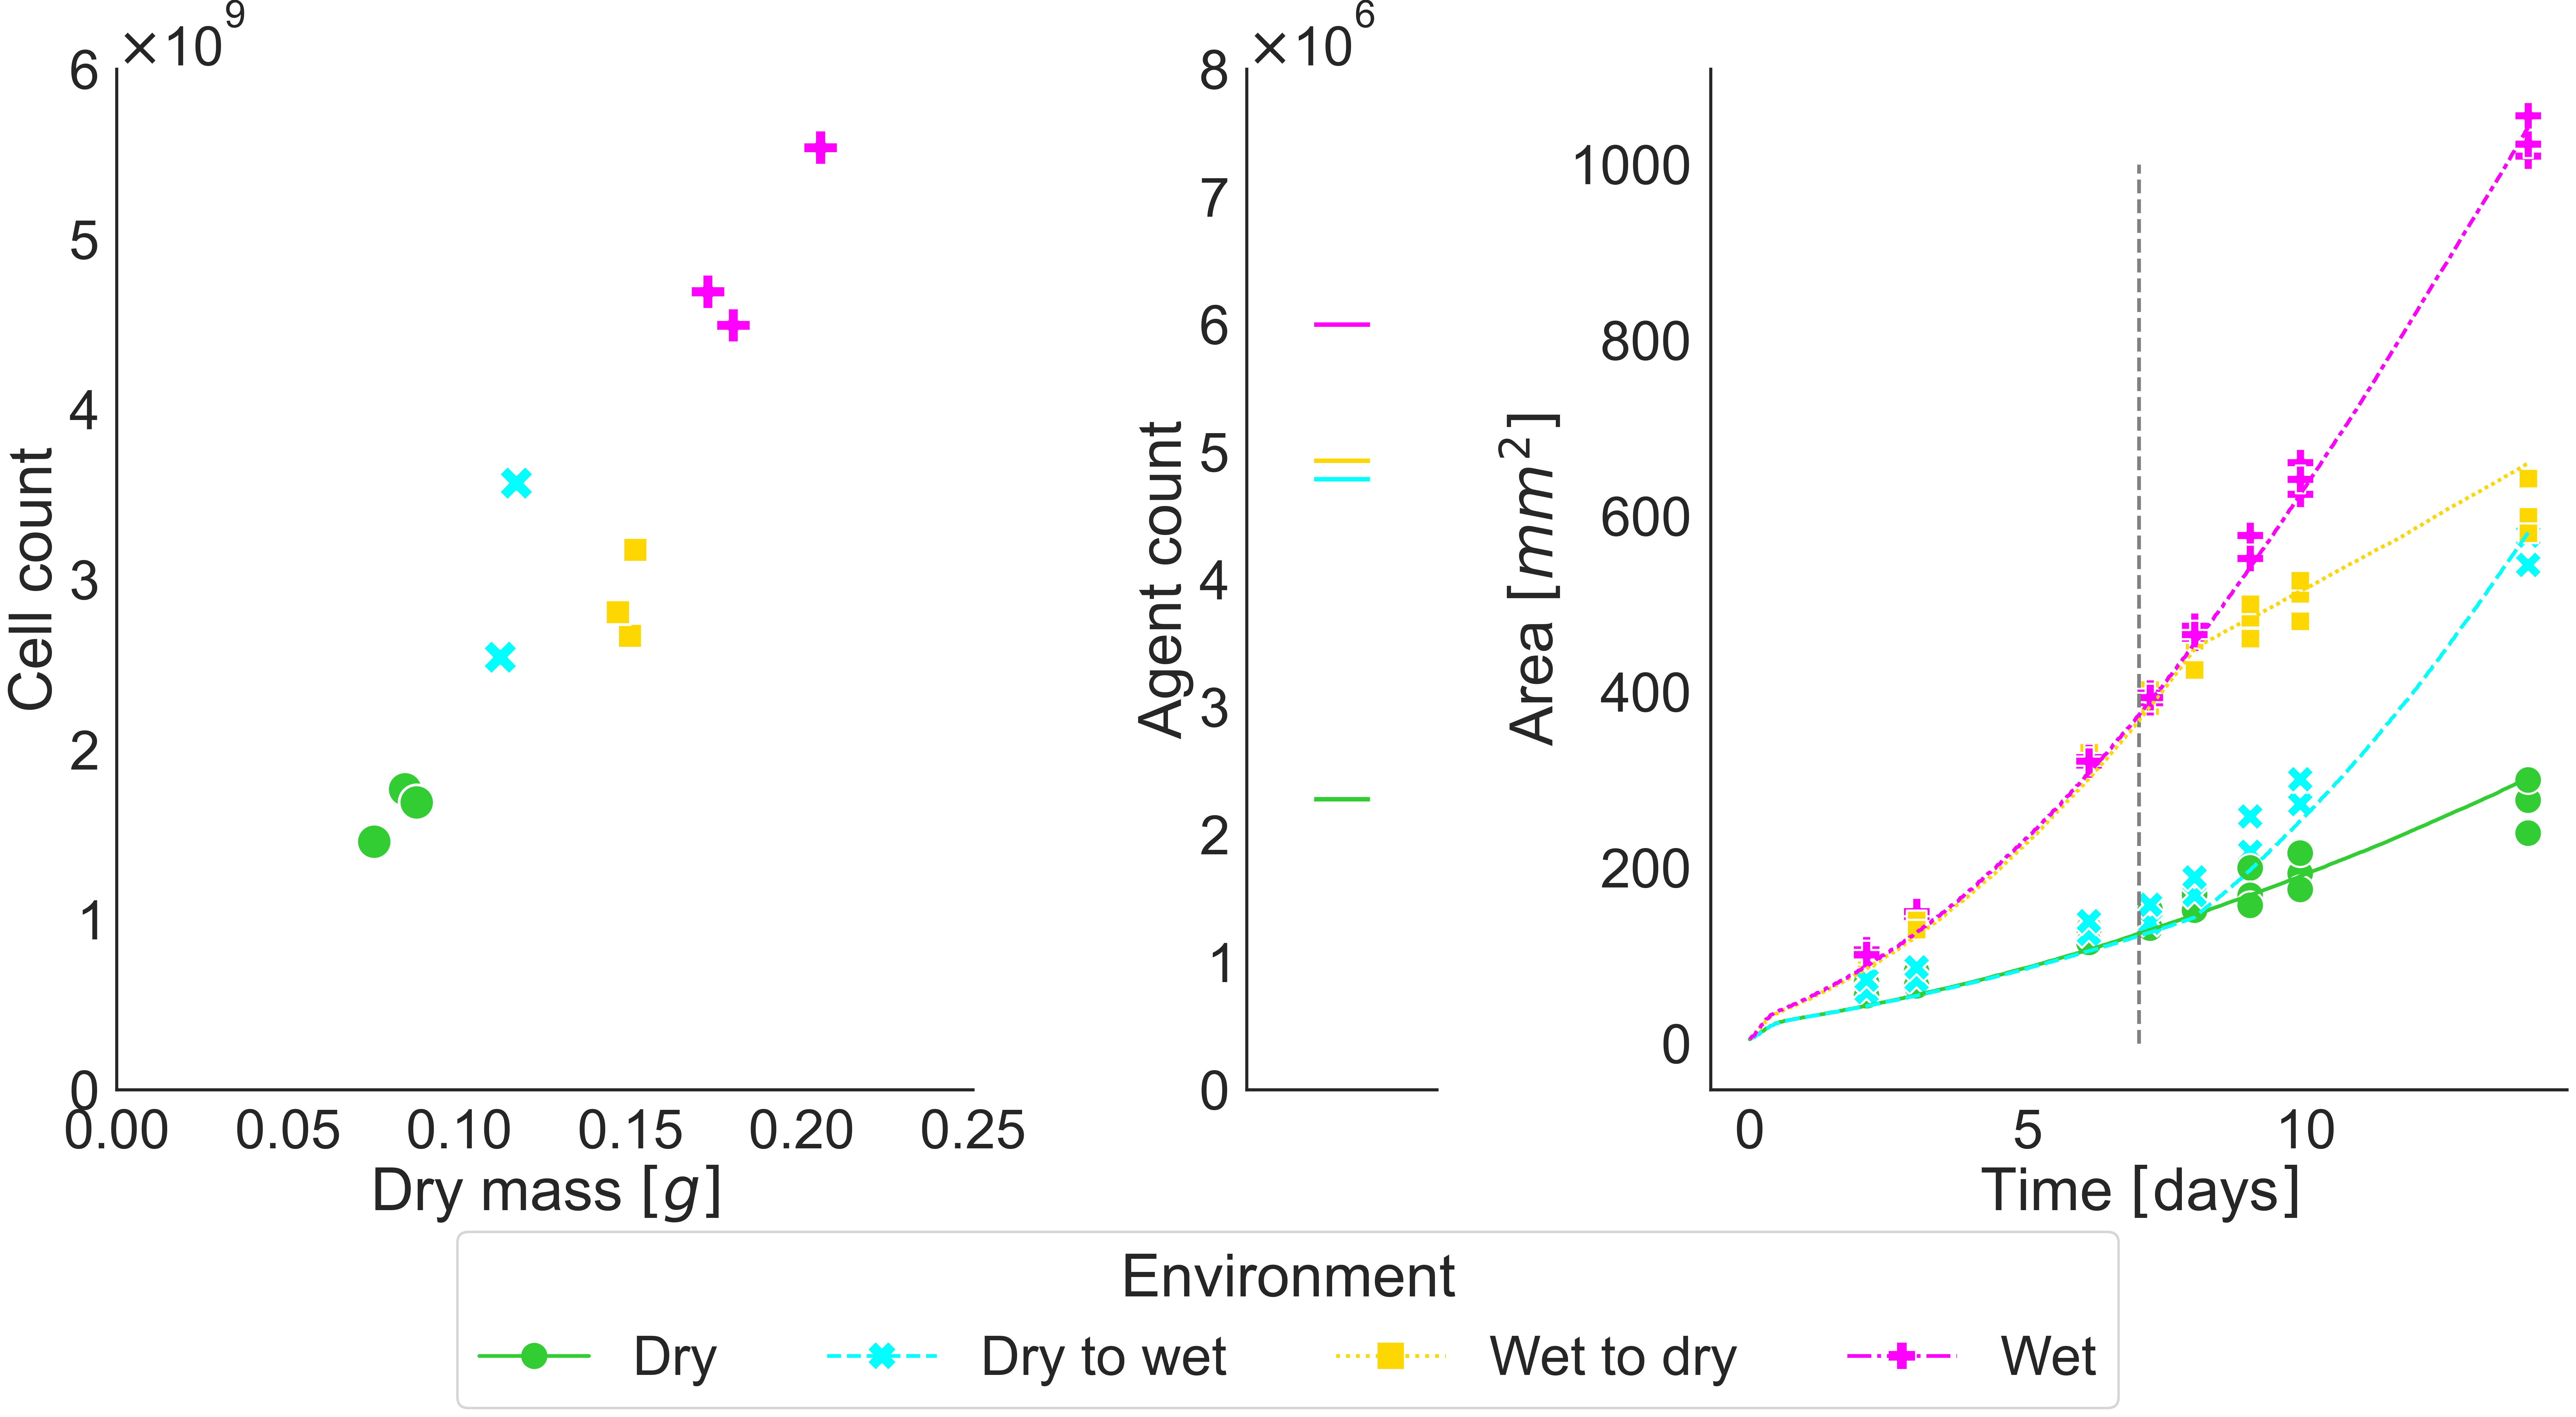

In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

# Set the figure size and context
sns.set(rc={'figure.figsize': (20, 20)})
sns.set_context("poster", font_scale=2)
sns.set_style("white")

# Define the colors and legend mapping
colors = ['limegreen', 'cyan', 'gold', 'magenta']
sns.set_palette(colors)

legend_map = {'A - dry': 'Dry', 'C - wet to dry': 'Wet to dry', 'B - dry to wet': 'Dry to wet', 'D - wet': 'Wet'}

# Create the subplots using gridspec
fig = plt.figure(figsize=(30, 15))
gs = gridspec.GridSpec(1, 3, width_ratios= [4.5, 1, 4.5])

# First subplot
ax1 = plt.subplot(gs[0])
sns.scatterplot(data=df_wetdry2, x="Dry_Mass_g", y="Cell_count", hue="Conditions", style="Conditions", s=800, legend=False)
plt.ylim(0, 6000000000)
plt.xlim(0, 0.25)
plt.xlabel('Dry mass $[g]$')
plt.ylabel('Cell count')
plt.ticklabel_format(axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=True)
sns.despine()

# Second subplot



ax3 = plt.subplot(gs[1])
sns.scatterplot(data=df_cellno, x=1, y="living+dead", s=2000, marker = "_", hue='condition' , legend = None,  ax=ax3)
plt.ylabel('Agent count')
plt.ylim(0, 8000000)
ax3.set_xticklabels("")
plt.ticklabel_format(axis='y', style='sci', scilimits=None, useOffset=None, useLocale=None, useMathText=True)
sns.despine()




ax2 = plt.subplot(gs[2])
sns.scatterplot(data=wetdry2_growth, x="Elapsed time (Days)", y="Area_mm2", hue="Conditions", style="Conditions", s=500, legend=False)
sns.lineplot(data=WDsimul_jav, x='Time (Days)', y='Area', hue="Conditions", style="Conditions", ax=ax2, legend=False)
ax2.vlines(7, 0, 1000, colors = "grey", linestyles = "dashed")
plt.ylabel('Area $[mm^2]$')
plt.xlabel('Time $[$days$]$')
sns.despine()

# Legend
legend_labels = ['Dry', 'Dry to wet', 'Wet to dry', 'Wet']
legend_handles = [
    plt.Line2D([0], [0], marker='o', color=colors[0], linestyle='-', label=legend_labels[0], markerfacecolor=colors[0], markersize=20),
    plt.Line2D([0], [0], marker='X', color=colors[1], linestyle='--', label=legend_labels[1], markerfacecolor=colors[1], markersize=20),
    plt.Line2D([0], [0], marker='s', color=colors[2], linestyle=':', label=legend_labels[2], markerfacecolor=colors[2], markersize=20),
    plt.Line2D([0], [0], marker='P', color=colors[3], linestyle='-.', label=legend_labels[3], markerfacecolor=colors[3], markersize=20)
]

fig.legend(handles=legend_handles, labels=legend_labels, title='Environment', loc='lower center', bbox_to_anchor=(0.5, -0.11), ncol=4)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()